# Fast lap analysis

First create an InfluxDB client by importing the modules and setting all the required configuration.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS

import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

# configure influxdb client
ORG = "b4mad"
TOKEN = os.environ.get(
    "INFLUXDB_TOKEN",
    "citqAMr66LLb25hvaaZm2LezOc88k2ocOFJcJDR6QB-RmLJa_-sAr9kYB4vSFYaz8bt26lm7SokVgpQKdgKFKA==",
)
URL = "https://telemetry.b4mad.racing/"

# and create the client and a quary api
client = influxdb_client.InfluxDBClient(url=URL, token=TOKEN, org=ORG)
query_api = client.query_api()

gameName = "iRacing"
trackCode = "sebring international"
carModel = "Ferrari 488 GT3 Evo 2020"

Find all sessions for our track and car.

In [2]:
query = f"""
    from(bucket: "racing")
        |> range(start:-10y, stop: now())
        |> filter(fn: (r) => r._field == "CurrentLapTime" and r["GameName"] == "{gameName}" )
        |> filter(fn: (r) => r["CarModel"] == "{carModel}" )
        |> filter(fn: (r) => r["TrackCode"] == "{trackCode}" )
        |> last()
        |> limit(n: 1)
        |> keep(columns: ["_time", "_value", "CarModel","TrackCode", "SessionId", "SessionTypeName"])
        |> group()
"""

df = query_api.query_data_frame(org=ORG, query=query)
df

,result,table,_time,_value,CarModel,SessionId,SessionTypeName,TrackCode
0,_result,0,2022-11-22 18:56:23.426000+00:00,101.137070,Ferrari 488 GT3 Evo 2020,1669141800,Practice,sebring international
1,_result,0,2022-11-22 19:00:01.518000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143592,Race,sebring international
2,_result,0,2022-11-22 19:00:03.579000+00:00,2.023300,Ferrari 488 GT3 Evo 2020,1669143601,Race,sebring international
3,_result,0,2022-11-22 19:01:02.437000+00:00,60.839966,Ferrari 488 GT3 Evo 2020,1669143603,Race,sebring international
4,_result,0,2022-11-22 19:01:43.521000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143678,Race,sebring international
5,_result,0,2022-11-22 19:01:45.643000+00:00,2.156700,Ferrari 488 GT3 Evo 2020,1669143703,Race,sebring international
6,_result,0,2022-11-22 19:06:25.404000+00:00,21.816000,Ferrari 488 GT3 Evo 2020,1669143705,Race,sebring international
7,_result,0,2022-11-22 19:06:51.497000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143986,Race,sebring international
8,_result,0,2022-11-22 19:06:54.695000+00:00,3.223333,Ferrari 488 GT3 Evo 2020,1669144011,Race,sebring international
9,_result,0,2022-11-22 19:10:17.410000+00:00,70.870100,Ferrari 488 GT3 Evo 2020,1669144014,Race,sebring international


Now we can query the data for a specific session.

In [3]:
# get the last row in the dataframe
SESSION = df.iloc[-1]["SessionId"]

query = f"""
from(bucket: "racing")
  |> range(start: -10y, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "laps_cc")
//  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
  |> filter(fn: (r) => r["SessionId"] == "{SESSION}")
  |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
  |> sort(columns: ["_time"], desc: false)
"""

df = query_api.query_data_frame(org=ORG, query=query)
df

,result,table,_start,_stop,_time,CarModel,GameName,SessionId,SessionTypeName,TrackCode,...,Clutch,CurrentLap,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle
0,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:01:32.414000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5566.95300,2.0,0.0,0.0,31.750063,-0.086433,1.000000
1,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:01:32.445000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5568.01500,2.0,0.0,0.0,31.940120,-0.086433,1.000000
2,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:01:32.476000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5569.08300,2.0,0.0,0.0,32.126000,-0.086433,1.000000
3,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:01:32.507000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5570.15700,2.0,0.0,0.0,32.315220,-0.086433,1.000000
4,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:01:32.538000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5571.23800,2.0,0.0,0.0,32.509575,-0.086433,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33171,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:18:42.631000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,8.0,120.107933,5435.22266,3.0,0.0,0.0,38.392506,-1.283112,0.951155
33172,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:18:42.662000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,8.0,120.141266,5436.46100,3.0,0.0,0.0,38.480133,-1.272218,0.997950
33173,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:18:42.693000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,8.0,120.174600,5437.70264,3.0,0.0,0.0,38.579773,-1.257936,1.000000
33174,_result,0,2012-11-29 03:11:57.912295+00:00,2022-11-29 15:11:57.912295+00:00,2022-11-25 21:18:42.724000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,8.0,120.207932,5438.94775,3.0,0.0,0.0,38.670950,-1.242442,1.000000


Now we can plot the data, starting with just the brake inputs and the time on the x axis.

<AxesSubplot:xlabel='datetime'>

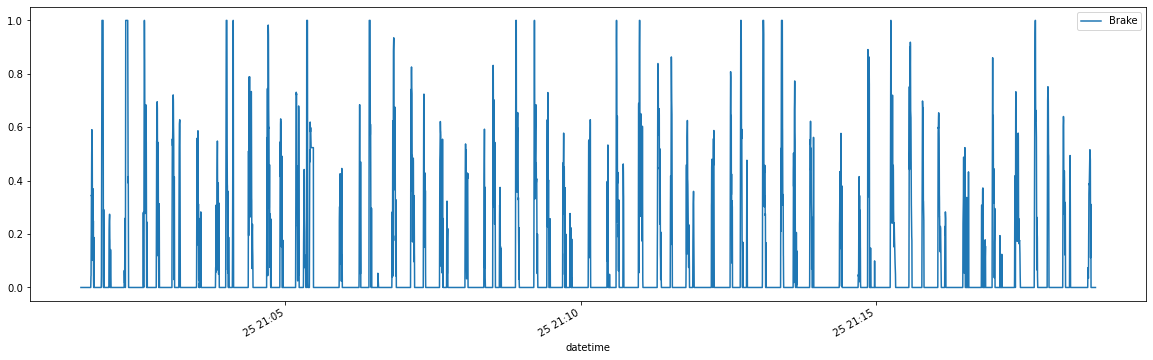

In [4]:
brake = df.copy()
brake = brake[["Brake", "_time"]]
brake["datetime"] = pd.to_datetime(brake["_time"])
brake.drop(columns=["_time"], inplace=True)
brake.set_index("datetime", inplace=True)
brake.sort_index(inplace=True)
plt.rcParams["figure.figsize"] = (20, 6)
brake.plot()

Now plot every other value column, the x-axis is the just the index of the DataFrame.

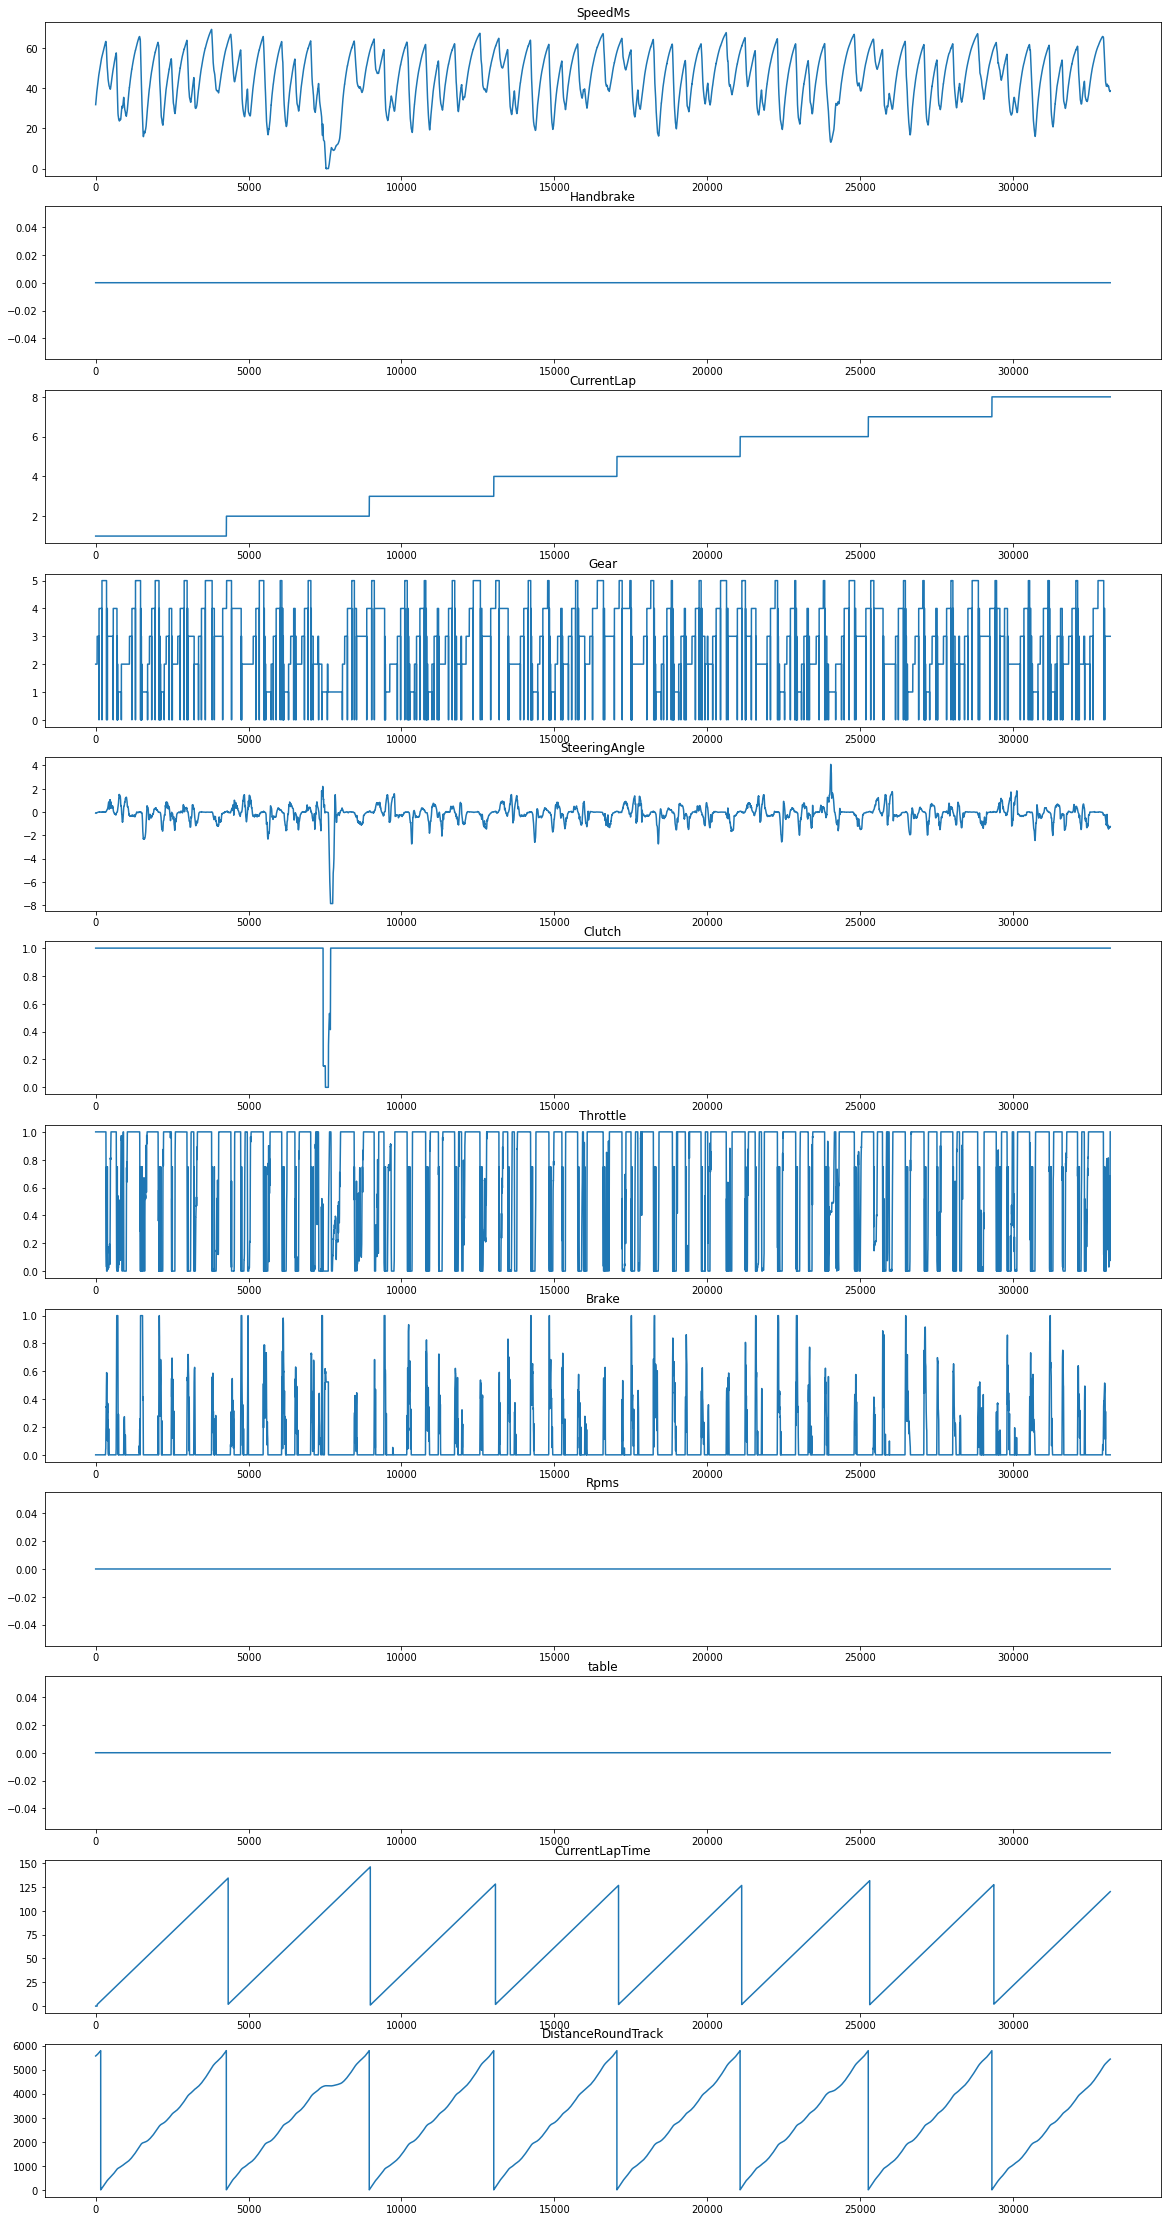

In [5]:
plt.rcParams["figure.figsize"] = (20, 40)
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
newdf = df.select_dtypes(include=numerics)
cols = set(newdf.columns)
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    newdf[c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

And just a single lap.

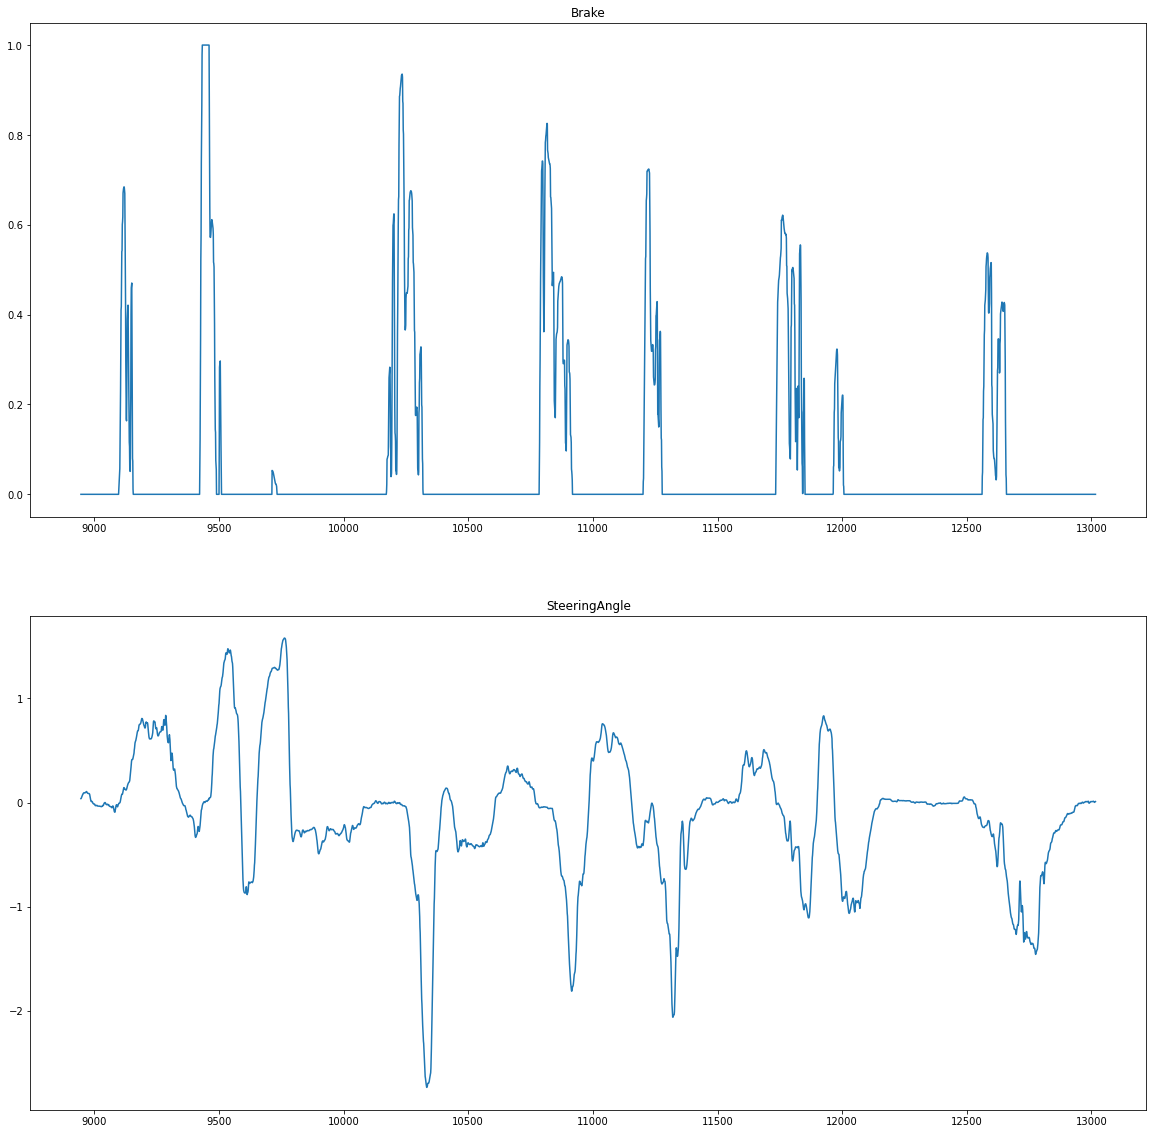

In [6]:
lap = 3
plt.rcParams["figure.figsize"] = (20, 20)
cols = ["Brake", "SteeringAngle"]
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    df.loc[df["CurrentLap"] == lap, c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

Now we plot all brake values for all laps against the distance.

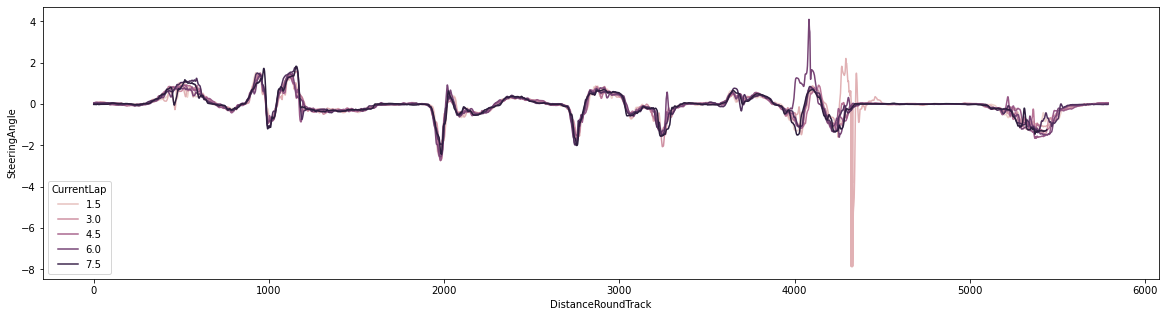

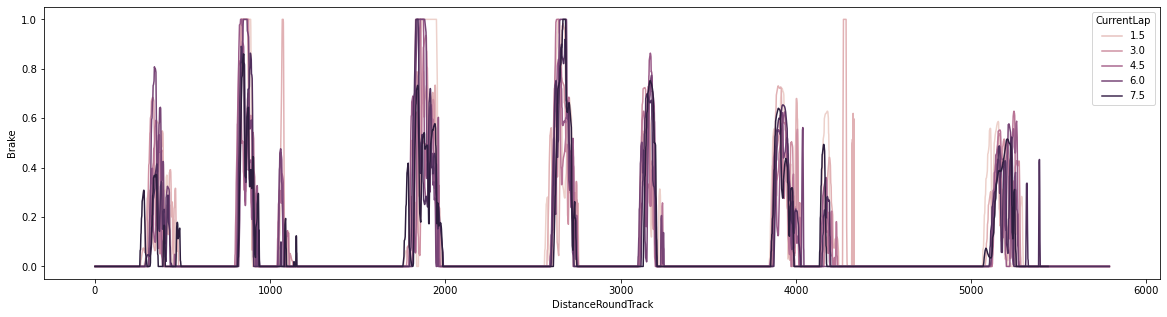

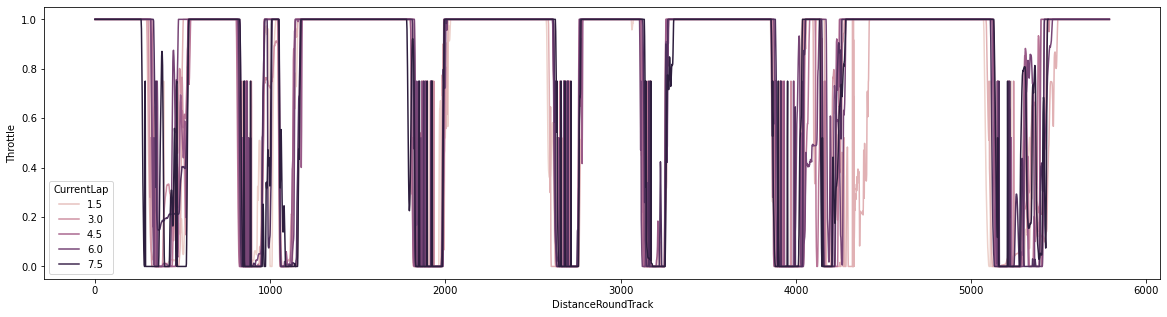

In [7]:
plt.rcParams["figure.figsize"] = (20, 5)
for c in ["SteeringAngle", "Brake", "Throttle"]:
    sns.lineplot(data=df, x="DistanceRoundTrack", y=c, hue="CurrentLap", legend=True)
    plt.show()

# Find n fastest laps

Iterate over all sessions and find the n fastest laps. A lap is considered complete, if the `DistanceRoundTrack` is reached. The time for a lap is the last value of the `CurrentLapTime` column.

In [2]:
# First, get all session
query = f"""
    from(bucket: "racing")
        |> range(start:-10y, stop: now())
        |> filter(fn: (r) => r._field == "CurrentLapTime" and r["GameName"] == "{gameName}" )
        |> filter(fn: (r) => r["CarModel"] == "{carModel}" )
        |> filter(fn: (r) => r["TrackCode"] == "{trackCode}" )
        |> last()
        |> limit(n: 1)
        |> keep(columns: ["_time", "_value", "CarModel","TrackCode", "SessionId", "SessionTypeName"])
        |> group()
"""

df_all_sessions = query_api.query_data_frame(org=ORG, query=query)

In [5]:
# Define the length of the track, i.e. the minimal and maximal values
# that DistanceRoundTrack should contain
minDist = 0
maxDist = 5780

# Create a function to get the lap duration of each full lap of a given session
def get_lap_durations(df):
    ###
    # - df is a dataframe of a given session
    # - laps is a list containing full laps
    # - lapDurations is a list containing the lap duration of each full lap
    # Define DistanceRoundTrack range of a full lap
    # this is no longer needed since it's hardcoded above
    # minDist = df['DistanceRoundTrack'].min()
    # maxDist = df['DistanceRoundTrack'].max()

    # Create a mask to select only full laps
    laps = np.unique(df['CurrentLap'])
    msk = [(np.less(df['DistanceRoundTrack'][df['CurrentLap']==l], minDist+10).sum() > 0)
          & (np.greater(df['DistanceRoundTrack'][df['CurrentLap']==l], maxDist-10).sum() > 0)
          for l in laps]
    fullLaps = laps[msk]
    # Get all lap durations
    lapDurations = [df['CurrentLapTime'][df['CurrentLap']==l].iloc[-1]
                  for l in fullLaps]
    return fullLaps, lapDurations

In [13]:
# Loop over all sessions, and extract lap duration for each full lap
session_list = []
full_lap_list = []
lap_duration_list = []

# If you want to loop over the 10 first sessions, use the following line
# for session in df_all_sessions['SessionId']:
# Loop over all sessions :
for session in df_all_sessions['SessionId']:
    query = f"""
    from(bucket: "racing")
      |> range(start: -10y, stop: now())
      |> filter(fn: (r) => r["_measurement"] == "laps_cc")
    //  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
      |> filter(fn: (r) => r["SessionId"] == "{session}")
      |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
      |> sort(columns: ["_time"], desc: false)
    """
    # open the data frame corresponding to session
    df = query_api.query_data_frame(org=ORG, query=query)
    # get the lap duration for each full lap
    laps, lapDurations = get_lap_durations(df)
    session_list.extend([session for i in range(len(laps))])
    full_lap_list.extend(laps)
    lap_duration_list.extend(lapDurations)

In [14]:
# Print all SessionId ; CurrentLap; total lap duration
for i in range(len(session_list)):
    print(f"SessionId: {session_list[i]} ; CurrentLap: {full_lap_list[i]} ; LapDuration: {lap_duration_list[i]}")

SessionId: 1669141800 ; CurrentLap: 1.0 ; LapDuration: 125.8207
SessionId: 1669141800 ; CurrentLap: 2.0 ; LapDuration: 125.9081
SessionId: 1669141800 ; CurrentLap: 3.0 ; LapDuration: 300.892975
SessionId: 1669141800 ; CurrentLap: 4.0 ; LapDuration: 126.744469
SessionId: 1669141800 ; CurrentLap: 5.0 ; LapDuration: 124.15847
SessionId: 1669141800 ; CurrentLap: 6.0 ; LapDuration: 129.088669
SessionId: 1669141800 ; CurrentLap: 7.0 ; LapDuration: 137.064362
SessionId: 1669143603 ; CurrentLap: 1.0 ; LapDuration: 60.8399658
SessionId: 1669143705 ; CurrentLap: 1.0 ; LapDuration: 134.940033
SessionId: 1669143705 ; CurrentLap: 2.0 ; LapDuration: 125.1491
SessionId: 1669143705 ; CurrentLap: 3.0 ; LapDuration: 21.816
SessionId: 1669144014 ; CurrentLap: 1.0 ; LapDuration: 135.056671


In [16]:
# Sort the lap durations list
msk = np.argsort(lap_duration_list)
session_list = np.array(session_list)[msk]
full_lap_list = np.array(full_lap_list)[msk]
lap_duration_list = np.array(lap_duration_list)[msk]

# Print the n fastest laps
n = 10
for i in range(n):
    print(f"SessionId: {session_list[i]} ; CurrentLap: {full_lap_list[i]} ; LapDuration: {lap_duration_list[i]}")

SessionId: 1669143705 ; CurrentLap: 3.0 ; LapDuration: 21.816
SessionId: 1669143603 ; CurrentLap: 1.0 ; LapDuration: 60.8399658
SessionId: 1669141800 ; CurrentLap: 5.0 ; LapDuration: 124.15847
SessionId: 1669143705 ; CurrentLap: 2.0 ; LapDuration: 125.1491
SessionId: 1669141800 ; CurrentLap: 1.0 ; LapDuration: 125.8207
SessionId: 1669141800 ; CurrentLap: 2.0 ; LapDuration: 125.9081
SessionId: 1669141800 ; CurrentLap: 4.0 ; LapDuration: 126.744469
SessionId: 1669141800 ; CurrentLap: 6.0 ; LapDuration: 129.088669
SessionId: 1669143705 ; CurrentLap: 1.0 ; LapDuration: 134.940033
SessionId: 1669144014 ; CurrentLap: 1.0 ; LapDuration: 135.056671


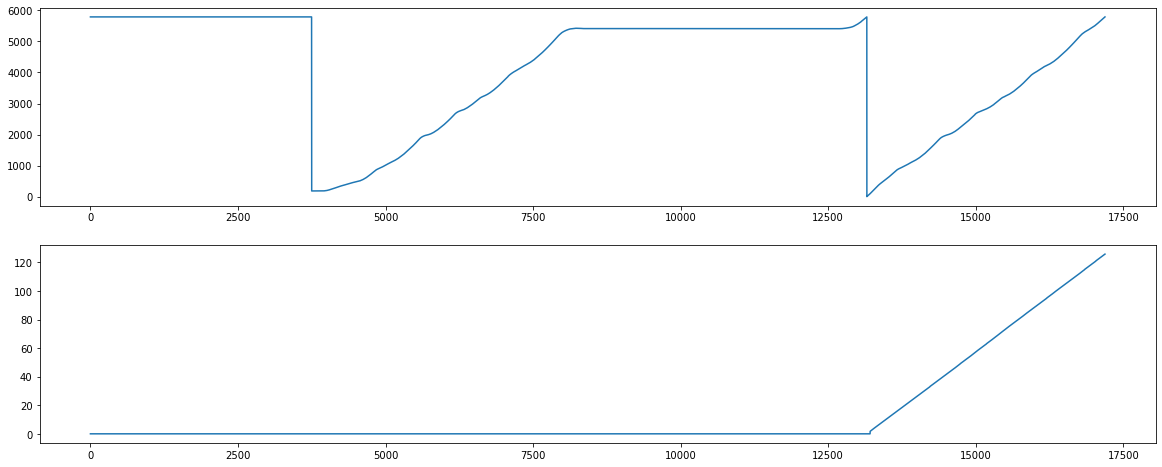

In [23]:
# A cell to check the DistanceRoundTrack and CurrentLapTime plots
# for a given (SessionId, CurrentLap) couple
session=1669141800
lap=1

query = f"""
from(bucket: "racing")
  |> range(start: -10y, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "laps_cc")
//  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
  |> filter(fn: (r) => r["SessionId"] == "{session}")
  |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
  |> sort(columns: ["_time"], desc: false)
"""

df = query_api.query_data_frame(org=ORG, query=query)
fig, ax = plt.subplots(2, figsize=(20,8))
ax[0].plot(df['DistanceRoundTrack'][df['CurrentLap']==lap])
ax[1].plot(df['CurrentLapTime'][df['CurrentLap']==lap])

# Splice a track into segments

Using the combined / averaged values of the `SteeringAngle` data, we want to splice the track `DistanceRoundTrack` into segments. 
* A segement is defined by the start and end of a major turn.
* Each segment connects directly to the next segment.
* The start of a segment is the middle betwee two turns (i.e not just at the beginning of a turn).

See below for the example of the `sebring international` track.


# Extract track data from fastest laps

From all fastest laps we want to extract the average value for the track guide data.


In [11]:
# load csv into dataframe
df = pd.read_csv("../pitcrew/Ferrari 488 GT3 Evo 2020-sebring international.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '../pitcrew/Ferrari 488 GT3 Evo 2020-sebring international.csv'

* start / end: the start and end of the turn (see above)
* brake: the average DistanceRoundTrack when the brake is pressed the first time
* turn_in: the average DistanceRoundTrack when the steering wheel is turned into the corner (maybe use rate of change)
* force: the average value of the maximum brake force during the turn 
* gear: the average value of the lowest gear during the turn
* speed: the lowest value during the turn
* stop: the average value when the brake force is starting to decrease
* accelerate: the average DistanceRoundTrack when the throttle is pressed again during the turn
